# 1. Install Dependencies and Setup

In [6]:
!pip install tensorflow  opencv-python matplotlib

In [7]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [5]:
import tensorflow as tf
import os

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

C:\Users\varun\AppData\Local\Temp\ipykernel_6044\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 421 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

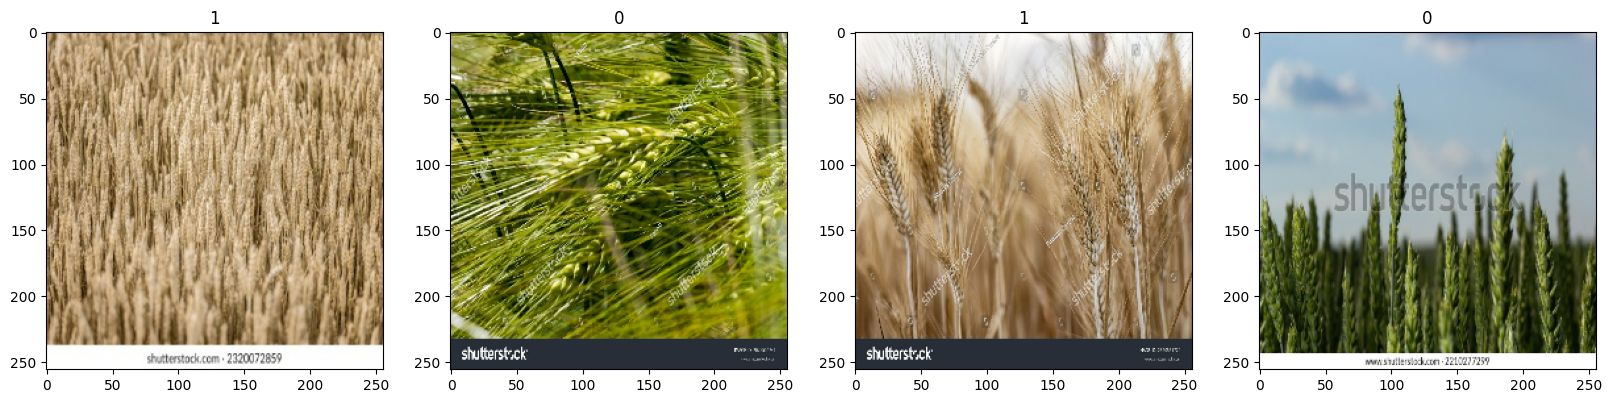

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[0.41719037, 0.53091586, 0.30861193],
          [0.41927084, 0.54100364, 0.26630762],
          [0.383127  , 0.50972015, 0.25181574],
          ...,
          [0.25163192, 0.3771221 , 0.12532887],
          [0.3286152 , 0.45022547, 0.21480641],
          [0.39883578, 0.51648283, 0.2750335 ]],
 
         [[0.44123536, 0.55372435, 0.3401937 ],
          [0.47352463, 0.6026348 , 0.32435423],
          [0.4398222 , 0.5640012 , 0.31092507],
          ...,
          [0.25956506, 0.38128686, 0.14542308],
          [0.33244246, 0.4465921 , 0.21877585],
          [0.38473165, 0.49984682, 0.26951593]],
 
         [[0.4489052 , 0.5713317 , 0.3594669 ],
          [0.48964462, 0.6237745 , 0.35554534],
          [0.46250048, 0.59365857, 0.34285146],
          ...,
          [0.28353775, 0.39954045, 0.1856316 ],
          [0.33515337, 0.4489277 , 0.23401357],
          [0.37231207, 0.48603755, 0.2654043 ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size

9

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 814ms/step - accuracy: 0.6969 - loss: 1.3432 - val_accuracy: 0.6406 - val_loss: 0.6576
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 590ms/step - accuracy: 0.6509 - loss: 0.6430 - val_accuracy: 0.7188 - val_loss: 0.5297
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 586ms/step - accuracy: 0.7422 - loss: 0.5057 - val_accuracy: 0.9062 - val_loss: 0.3242
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 582ms/step - accuracy: 0.9510 - loss: 0.2370 - val_accuracy: 0.9531 - val_loss: 0.1313
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step - accuracy: 0.9532 - loss: 0.1272 - val_accuracy: 0.9844 - val_loss: 0.0475
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 587ms/step - accuracy: 0.9711 - loss: 0.0734 - val_accuracy: 0.9688 - val_loss: 0.0809
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 623ms/step - accuracy: 0.9812 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 0.0297
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 685ms/step - accuracy: 0.9812 - loss: 0.0377 - val_accuracy: 0.9844 - val_loss

# 8. Plot Performance

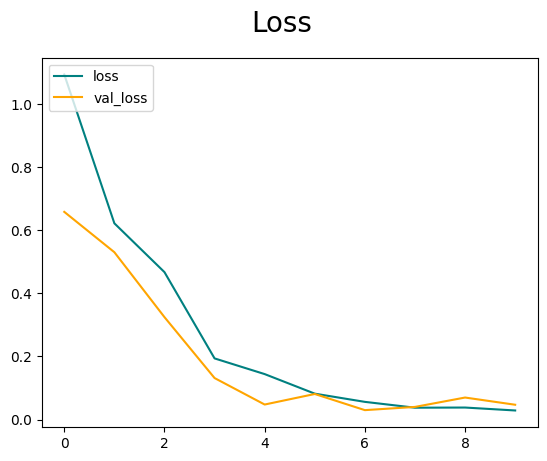

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

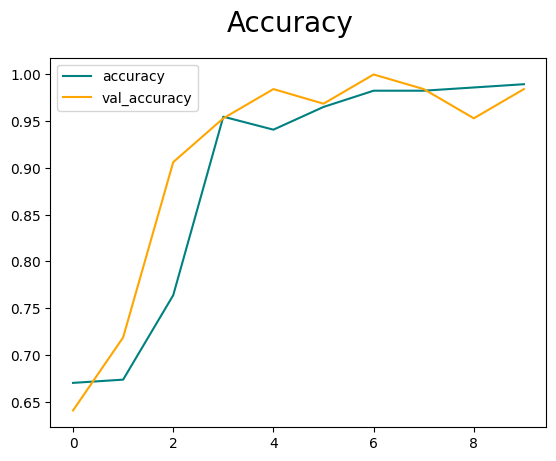

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [40]:
import cv2

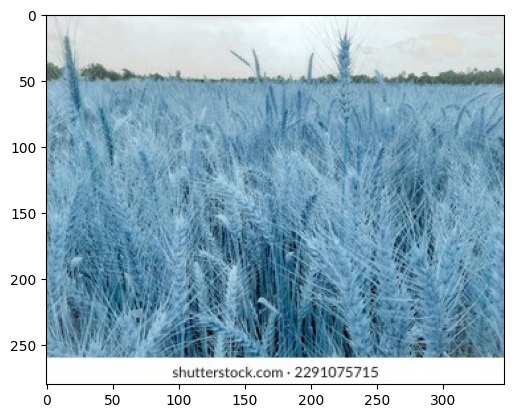

In [52]:
img = cv2.imread('122.jpg')
plt.imshow(img)
plt.show()

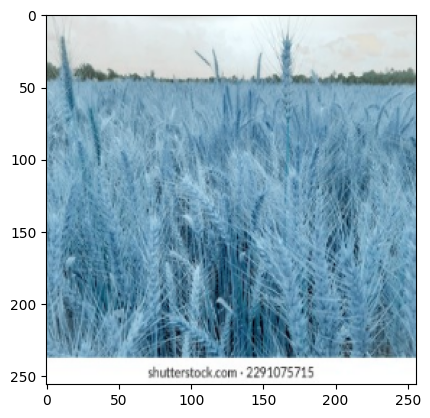

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [56]:
yhat

array([[0.02469411]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Immature')
    print(yhat*100)
else:
    print(f'Predicted class is Mature')
    print(100-yhat*100)

Predicted class is Mature
[[97.49696]]


# 11. Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','imageclassifier.h5'))

In [48]:
os.path.join('models','imageclassifier.h5')

'models\\imageclassifier.h5'

In [49]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [50]:
new_model

<Sequential name=sequential, built=True>

In [55]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.02469411]], dtype=float32)